In [1]:
import pandas as pd
import numpy as np
import random as rand
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Reading the data
data = pd.read_csv('./final_data (1).csv')
X = data.iloc[:, 1:]
Rank = data['rank']
X  = X.drop(['rank'], axis=1)

#standardizing the data
X_std = StandardScaler().fit_transform(X)
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Income from Investments                                     244 non-null    float64
 1   Interest on Balance with RBI and Other Inter-Bank funds     244 non-null    float64
 2   Others                                                      244 non-null    float64
 3   Total Income                                                244 non-null    float64
 4   Payments to and Provisions for Employees                    244 non-null    float64
 5   Operating Expenses (excludes Employee Cost & Depreciation)  244 non-null    float64
 6   Total Provisions and Contingencies                          244 non-null    float64
 7   Total Expenditure                                           244 non-null    float64
 8   

In [5]:
#PCA
pca = PCA()
pca.fit(X_std)
pca_data = pca.transform(X_std)
pca_loadings_ = pca.components_.T * np.sqrt(pca.explained_variance_)

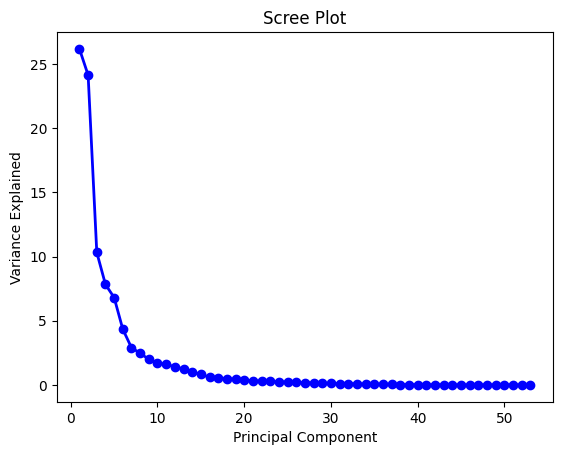

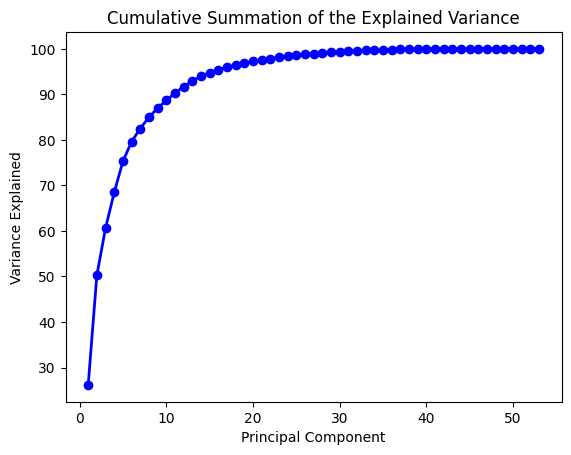

Number of components that explain 95% of the variance:  16


In [6]:
# Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_*100, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Plotting the Cumulative Summation of the Explained Variance
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_)*100, 'o-', linewidth=2, color='blue')
plt.title('Cumulative Summation of the Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# printing the number of components that explain 95% of the variance
print("Number of components that explain 95% of the variance: ", np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1)

In [7]:
n_components = 16
pca = PCA(n_components=n_components, random_state = 123)
pca.fit(X_std)

pc_loadings = pd.DataFrame(pca.components_, columns=X.columns)
pc_loadings

,Income from Investments,Interest on Balance with RBI and Other Inter-Bank funds,Others,Total Income,Payments to and Provisions for Employees,Operating Expenses (excludes Employee Cost & Depreciation),Total Provisions and Contingencies,Total Expenditure,Net Profit / Loss for The Year,Total Reserves and Surplus,...,Cost to Income (%),Interest Income/Total Assets (%),Non-Interest Income/Total Assets (%),Operating Profit/Total Assets (%),Operating Expenses/Total Assets (%),Interest Expenses/Total Assets (%),EV Per Net Sales (X),Price To Book Value (X),Price To Sales (X),Retention Ratios (%)
0,0.187883,0.152554,0.169963,0.188302,0.185500,0.146994,0.213791,0.213091,-0.172478,-0.103239,...,0.132117,-0.033715,-0.016109,-0.156096,-0.042108,0.042518,-0.053829,-0.096526,-0.106890,0.009108
1,-0.173280,-0.089159,-0.080497,-0.190718,-0.173251,-0.200517,-0.065034,-0.159317,-0.189204,-0.155706,...,0.119866,-0.067788,-0.061779,-0.154196,-0.092575,0.043753,-0.069763,-0.135586,-0.151209,0.007032
2,-0.064567,-0.078340,0.013640,-0.017903,-0.028344,0.065256,0.092102,0.002486,-0.106496,0.232494,...,0.265481,0.171487,0.288278,-0.211673,0.295407,0.016480,0.070239,0.186828,0.208918,0.009566
3,0.020714,-0.040651,0.024714,-0.024274,-0.046023,-0.019616,-0.050603,-0.024337,-0.007947,0.091951,...,-0.068898,-0.130673,-0.118619,0.037920,-0.080170,-0.041938,0.054259,-0.026150,0.036759,0.011916
4,0.070270,-0.155854,-0.123030,0.057094,-0.012401,0.052718,0.012022,0.063525,-0.037690,-0.072057,...,-0.132034,0.375984,0.127761,-0.084828,0.107418,0.458821,-0.343430,-0.053207,-0.133200,-0.005532
5,-0.036886,-0.072111,0.104287,-0.016536,-0.095868,-0.023949,0.130537,0.004326,-0.090918,0.100851,...,0.121530,-0.059273,0.129914,-0.136008,-0.156778,-0.072105,0.162844,-0.028450,0.022171,-0.048376
6,0.001841,0.106369,-0.090282,-0.021612,0.063825,0.006777,-0.045686,-0.008784,-0.120757,0.037089,...,0.092396,-0.066517,-0.270278,-0.009947,0.178503,-0.097135,0.039180,-0.028817,0.065800,0.231524
7,-0.030376,-0.135862,0.131485,-0.035157,-0.047330,0.036673,-0.010024,-0.032219,-0.004316,0.087073,...,0.069385,-0.243726,0.049939,-0.022560,0.037025,-0.232612,-0.371666,-0.432845,-0.309276,-0.343970
8,0.095775,-0.214738,-0.152427,0.031934,0.060197,0.026988,-0.062521,0.022817,-0.065312,-0.057383,...,0.018736,-0.047590,-0.223997,0.024454,0.003061,-0.011888,0.270439,0.275536,0.203509,-0.607601
9,0.053827,-0.419886,0.145684,0.007775,0.043224,0.103978,-0.053861,-0.000082,0.021423,-0.164034,...,0.081347,0.021393,-0.188461,0.093349,0.229913,-0.115472,-0.039487,0.007055,-0.060529,0.169715


In [ ]:
Xpca = pca.transform()